In [163]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


In [164]:
data = pd.read_csv(r"C:\Users\Lily Sun\Desktop\DAT 121\LifeExpectancyData-Python.csv")

In [165]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

could delete variables but have to delete from the entire discussion
- hepatitis
- alcohol
- polio
- diphtheria
- thinness variables
- income composition of resources
- status

In [166]:
data = data.drop(columns = ["Hepatitis B", "Alcohol", "Polio", "Diphtheria ", " thinness  1-19 years", " thinness 5-9 years", "Income composition of resources", "Status"])

# 1. Identify the dependent and independent variables 

# 2. Collect your data 

In [167]:
data.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,Schooling
0,Afghanistan,2015,65.0,263.0,62,71.279624,1154,19.1,83,8.16,0.1,584.259210,33736494.0,10.1
1,Afghanistan,2014,59.9,271.0,64,73.523582,492,18.6,86,8.18,0.1,612.696514,327582.0,10.0
2,Afghanistan,2013,59.9,268.0,66,73.219243,430,18.1,89,8.13,0.1,631.744976,31731688.0,9.9
3,Afghanistan,2012,59.5,272.0,69,78.184215,2787,17.6,93,8.52,0.1,669.959000,3696958.0,9.8
4,Afghanistan,2011,59.2,275.0,71,7.097109,3013,17.2,97,7.87,0.1,63.537231,2978599.0,9.5


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2938 non-null   object 
 1   Year                    2938 non-null   int64  
 2   Life expectancy         2928 non-null   float64
 3   Adult Mortality         2928 non-null   float64
 4   infant deaths           2938 non-null   int64  
 5   percentage expenditure  2938 non-null   float64
 6   Measles                 2938 non-null   int64  
 7    BMI                    2904 non-null   float64
 8   under-five deaths       2938 non-null   int64  
 9   Total expenditure       2712 non-null   float64
 10   HIV/AIDS               2938 non-null   float64
 11  GDP                     2490 non-null   float64
 12  Population              2286 non-null   float64
 13  Schooling               2775 non-null   float64
dtypes: float64(9), int64(4), object(1)
memor

In [169]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2938.000000,2938.000000,2904.000000,2938.000000,2712.00000,2938.000000,2490.000000,2.286000e+03,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,738.251295,2419.592240,38.321247,42.035739,5.93819,1.742103,7483.158469,1.275338e+07,11.992793
std,4.613841,9.523867,124.292079,117.926501,1987.914858,11467.272489,20.044034,160.445548,2.49832,5.077785,14270.169342,6.101210e+07,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.37000,0.100000,1.681350,3.400000e+01,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,4.685343,0.000000,19.300000,0.000000,4.26000,0.100000,463.935626,1.957932e+05,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,64.912906,17.000000,43.500000,4.000000,5.75500,0.100000,1766.947595,1.386542e+06,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,441.534144,360.250000,56.200000,28.000000,7.49250,0.800000,5910.806335,7.420359e+06,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,19479.911610,212183.000000,87.300000,2500.000000,17.60000,50.600000,119172.741800,1.293859e+09,20.700000


# 3. Using descriptive methods validate the integrity of the data. 
### Identify missing values, inconsistent measurement, or other possible issues with the data. Scatter plots are helpful for identifying problems. 

In [170]:
data.isnull().sum()

Country                     0
Year                        0
Life expectancy            10
Adult Mortality            10
infant deaths               0
percentage expenditure      0
Measles                     0
 BMI                       34
under-five deaths           0
Total expenditure         226
 HIV/AIDS                   0
GDP                       448
Population                652
Schooling                 163
dtype: int64

In [171]:
data.duplicated().sum()

0

In [172]:
print(data.columns)

Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'percentage expenditure', 'Measles ', ' BMI ',
       'under-five deaths ', 'Total expenditure', ' HIV/AIDS', 'GDP',
       'Population', 'Schooling'],
      dtype='object')


In [173]:
data_latest_year = data[data['Year'] == 2014]
data_latest_year.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,Schooling
1,Afghanistan,2014,59.9,271.0,64,73.523582,492,18.6,86,8.18,0.1,612.696514,327582.0,10.0
17,Albania,2014,77.5,8.0,0,428.749067,0,57.2,1,5.88,0.1,4575.763787,288914.0,14.2
33,Algeria,2014,75.4,11.0,21,54.237318,0,58.4,24,7.21,0.1,547.851700,39113313.0,14.4
49,Angola,2014,51.7,348.0,67,23.965612,11699,22.7,101,3.31,2.0,479.312240,2692466.0,11.4
65,Antigua and Barbuda,2014,76.2,131.0,0,2422.999774,0,47.0,0,5.54,0.2,12888.296670,NaN,13.9


In [174]:
data_latest_year.shape

(183, 14)

In [175]:
data_latest_year.isnull().sum()

Country                    0
Year                       0
Life expectancy            0
Adult Mortality            0
infant deaths              0
percentage expenditure     0
Measles                    0
 BMI                       2
under-five deaths          0
Total expenditure          2
 HIV/AIDS                  0
GDP                       28
Population                41
Schooling                 10
dtype: int64

In [176]:
data_latest_year = data_latest_year.dropna()

In [177]:
print(data_latest_year.isnull().sum())

Country                   0
Year                      0
Life expectancy           0
Adult Mortality           0
infant deaths             0
percentage expenditure    0
Measles                   0
 BMI                      0
under-five deaths         0
Total expenditure         0
 HIV/AIDS                 0
GDP                       0
Population                0
Schooling                 0
dtype: int64


In [178]:
print(data_latest_year.shape)

(139, 14)


# 4. Consider various functional forms. 
### There are a number of factors to consider here

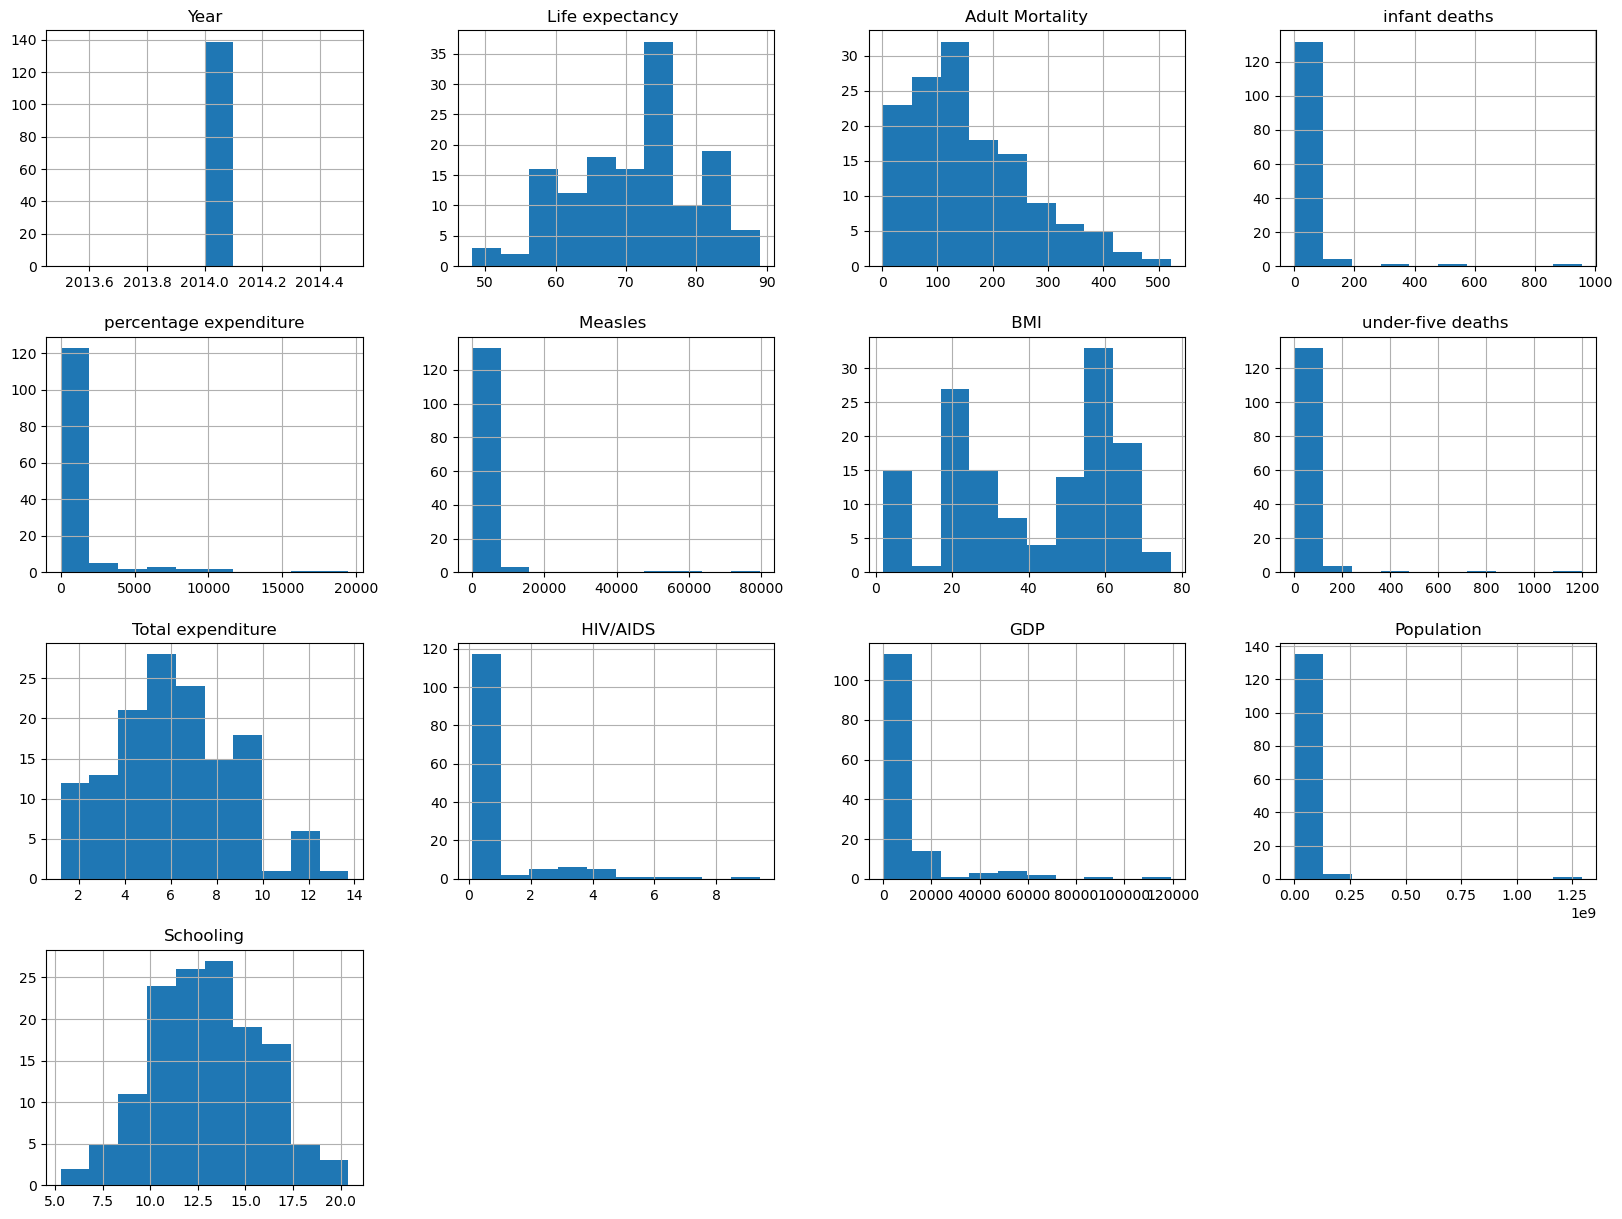

In [179]:
data_latest_year.hist(figsize=(20, 15))
plt.show()

In [180]:
data_latest_year.columns = data_latest_year.columns.str.strip()  # Remove leading/trailing spaces
data_latest_year.columns = data_latest_year.columns.str.replace(" ", "_").str.lower()  # Replace spaces with underscores and lowercase
print(data_latest_year.columns)

Index(['country', 'year', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'percentage_expenditure', 'measles', 'bmi',
       'under-five_deaths', 'total_expenditure', 'hiv/aids', 'gdp',
       'population', 'schooling'],
      dtype='object')


### Using scatter plots and simple linear regression models look for patterns in the data.  

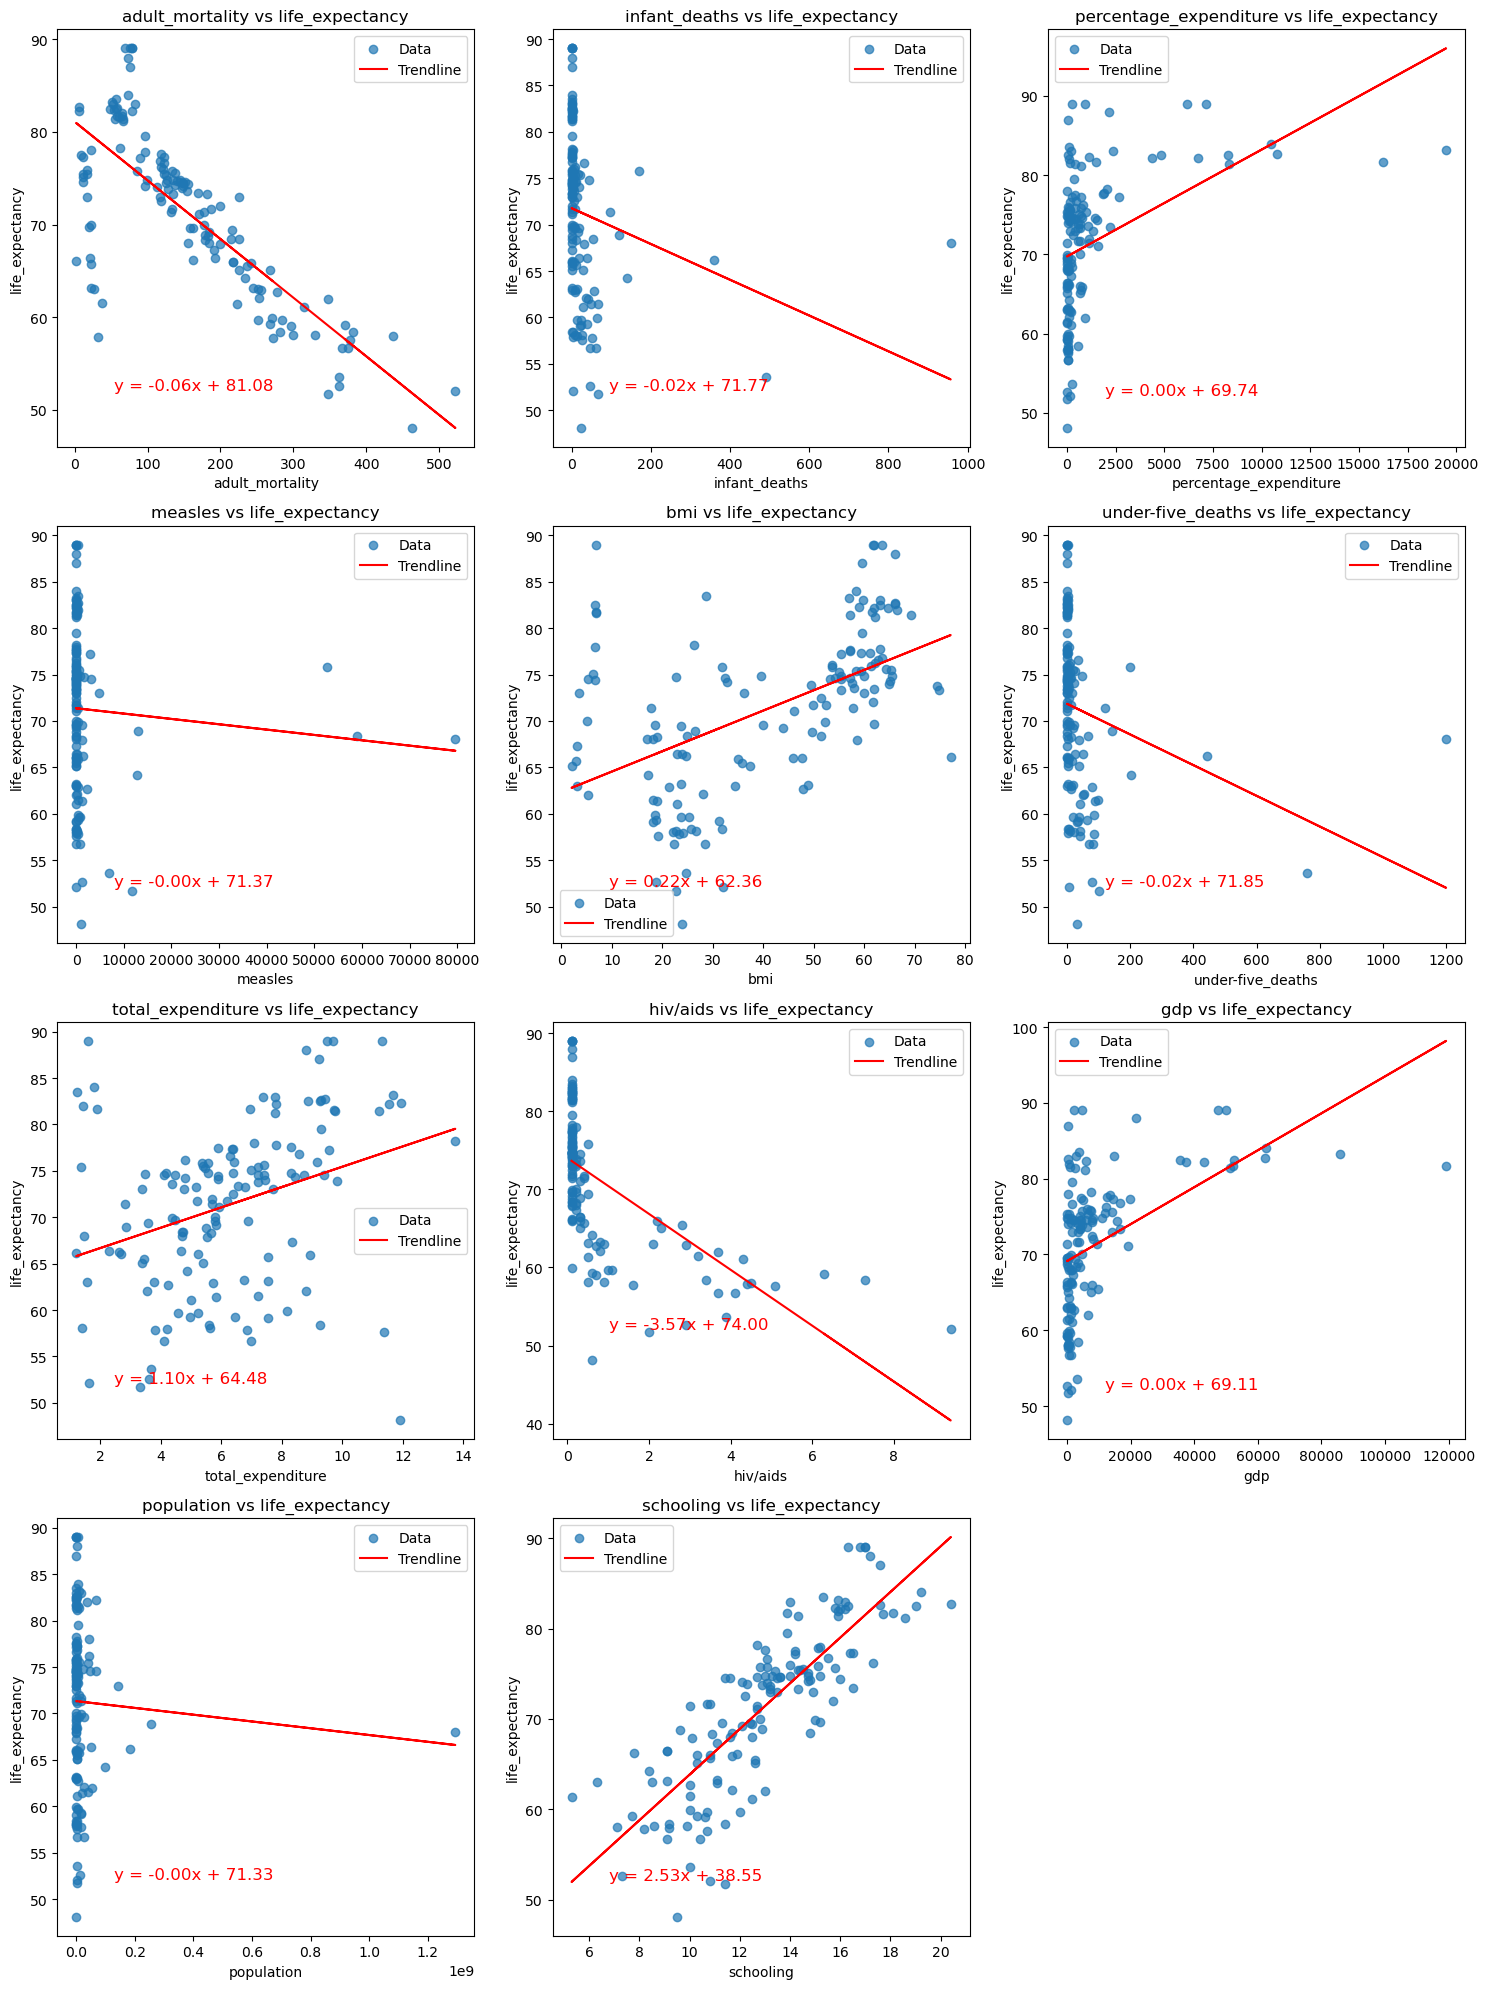

In [181]:
dependent_var = 'life_expectancy'
independent_vars = [col for col in data_latest_year.columns if col != dependent_var and col != 'country' and col != 'status' and col != 'year']

# Determine number of subplots (rows and columns)
n_vars = len(independent_vars)
n_cols = 3  # Choose the number of columns
n_rows = -(-n_vars // n_cols)  # Ceiling division to determine rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot scatterplots with trendlines
for i, var in enumerate(independent_vars):
    # Scatter plot
    axes[i].scatter(data_latest_year[var], data_latest_year[dependent_var], alpha=0.7, label='Data')
    
    # Compute the trendline
    x = data_latest_year[var]
    y = data_latest_year[dependent_var]
    coefficients = np.polyfit(x, y, 1)  # Linear fit (degree=1)
    trendline = np.poly1d(coefficients)

    # Extract slope and intercept
    slope, intercept = coefficients
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Plot the trendline
    axes[i].plot(x, trendline(x), color='red', label='Trendline')

    # Add equation of the trendline to the plot
    # Position the equation based on the data range
    x_pos = x.min() + (x.max() - x.min()) * 0.1
    y_pos = y.min() + (y.max() - y.min()) * 0.1
    axes[i].text(x_pos, y_pos, equation, color='red', fontsize=12)
    
    # Add labels and title
    axes[i].set_title(f"{var} vs {dependent_var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(dependent_var)
    axes[i].legend()

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\Lily Sun\AppData\Local\Temp\ipykernel_42180\2620459381.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_latest_year.drop(columns=['year']).corr()


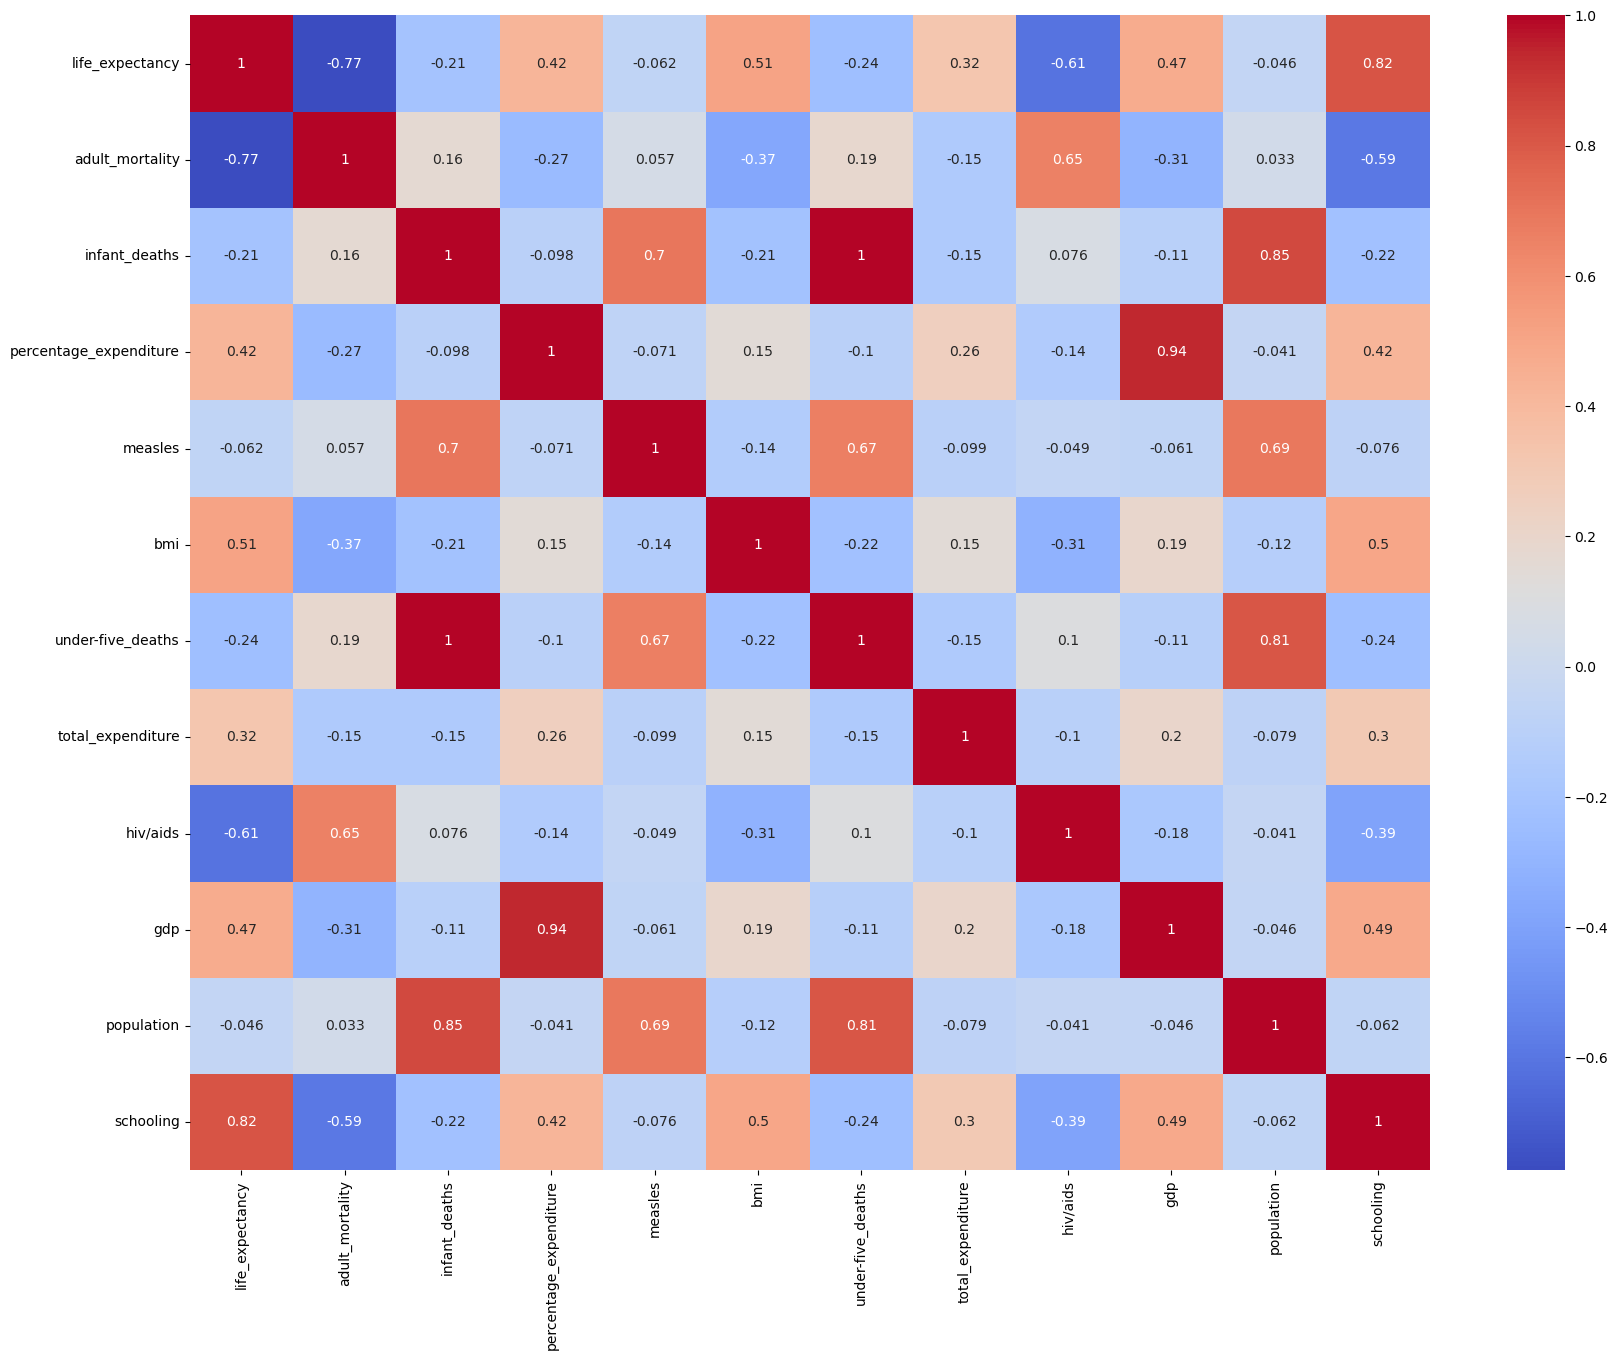

In [182]:
plt.figure(figsize=(20, 15))
corr = data_latest_year.drop(columns=['year']).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

### Descriptive Statistics Prior to Adjusting for Skewness

In [183]:
data_latest_year.describe()

,year,life_expectancy,adult_mortality,infant_deaths,percentage_expenditure,measles,bmi,under-five_deaths,total_expenditure,hiv/aids,gdp,population,schooling
count,139.0,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,1.390000e+02,139.000000
mean,2014.0,71.255396,155.330935,26.935252,1124.390011,1929.366906,40.612230,36.057554,6.183885,0.769065,8780.627083,2.123762e+07,12.935971
std,0.0,8.914848,109.032397,97.376098,2787.372372,9563.977920,20.899114,127.737830,2.625702,1.525144,17268.870149,1.133474e+08,2.888985
min,2014.0,48.100000,2.000000,0.000000,0.442802,0.000000,2.000000,0.000000,1.210000,0.100000,12.277330,4.100000e+01,5.300000
25%,2014.0,65.300000,67.500000,0.000000,50.300010,0.000000,22.850000,0.000000,4.485000,0.100000,566.579831,2.876005e+05,10.800000
50%,2014.0,73.000000,137.000000,2.000000,198.734350,10.000000,46.000000,3.000000,5.880000,0.100000,2734.883820,1.572466e+06,12.900000
75%,2014.0,76.700000,220.000000,18.000000,729.447713,278.000000,59.500000,22.000000,7.795000,0.500000,7784.788346,7.972217e+06,15.050000
max,2014.0,89.000000,522.000000,957.000000,19479.911610,79563.000000,77.100000,1200.000000,13.730000,9.400000,119172.741800,1.293859e+09,20.400000


### Adjust for Skewness

In [184]:
data_latest_year.skew()

C:\Users\Lily Sun\AppData\Local\Temp\ipykernel_42180\178102410.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_latest_year.skew()


year                       0.000000
life_expectancy           -0.227091
adult_mortality            0.836633
infant_deaths              7.523033
percentage_expenditure     4.285613
measles                    6.601621
bmi                       -0.258626
under-five_deaths          7.159611
total_expenditure          0.228010
hiv/aids                   3.063358
gdp                        3.611418
population                10.501806
schooling                 -0.017044
dtype: float64

A value > 0.5 (positively skewed) or < -0.5 (negatively skewed) may indicate significant skewness.

Highly skewed variables (positive skew):
positively_skewed_vars = [
    'infant_deaths', 'percentage_expenditure', 'measles', 
    'under-five_deaths', 'hiv/aids', 'gdp', 'population',
]

negatively_skewed_vars = ['Hepatitis B', 'Polio', 'Diphtheria']

In [188]:
data_latest_year.columns = data_latest_year.columns.str.strip()
data_latest_year.columns = data_latest_year.columns.str.replace(" ", "_").str.lower()
print(data_latest_year.columns)

Index(['country', 'year', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'percentage_expenditure', 'measles', 'bmi',
       'under-five_deaths', 'total_expenditure', 'hiv/aids', 'gdp',
       'population', 'schooling'],
      dtype='object')


In [189]:
positively_skewed_vars = [
    'infant_deaths', 'percentage_expenditure', 'measles', 
    'under-five_deaths', 'hiv/aids', 'gdp', 'population'
]

for var in positively_skewed_vars:
    data_latest_year[var] = np.log1p(data_latest_year[var])

In [190]:
data_latest_year.describe()

,year,life_expectancy,adult_mortality,infant_deaths,percentage_expenditure,measles,bmi,under-five_deaths,total_expenditure,hiv/aids,gdp,population,schooling
count,139.0,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,2014.0,71.255396,155.330935,0.805161,1.763440,0.995462,40.612230,0.855535,6.183885,0.271420,2.130269,2.698006,12.935971
std,0.0,8.914848,109.032397,0.629212,0.386169,0.904235,20.899114,0.640966,2.625702,0.299733,0.244788,0.196237,2.888985
min,2014.0,48.100000,2.000000,0.000000,0.312317,0.000000,2.000000,0.000000,1.210000,0.091038,1.277054,1.555545,5.300000
25%,2014.0,65.300000,67.500000,0.000000,1.596895,0.000000,22.850000,0.000000,4.485000,0.091038,1.993522,2.607811,10.800000
50%,2014.0,73.000000,137.000000,0.741276,1.840071,1.223156,46.000000,0.869742,5.880000,0.091038,2.187647,2.725769,12.900000
75%,2014.0,76.700000,220.000000,1.372307,2.027312,1.891653,59.500000,1.419607,7.795000,0.340368,2.298578,2.826786,15.050000
max,2014.0,89.000000,522.000000,2.062403,2.386668,2.508323,77.100000,2.090741,13.730000,1.206511,2.540683,3.090174,20.400000


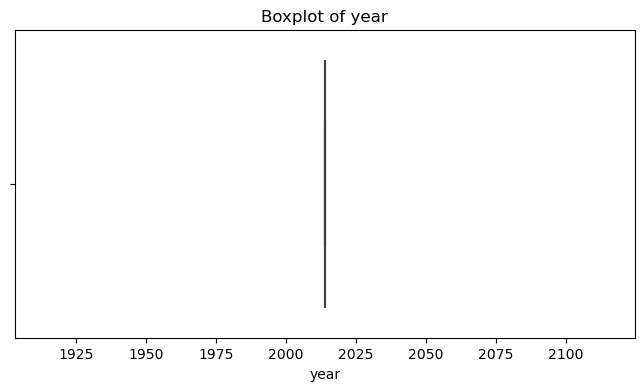

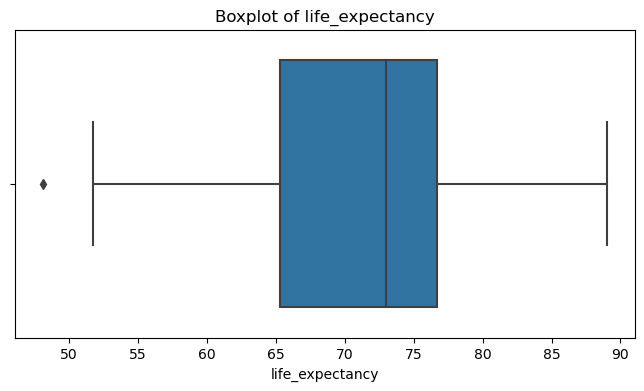

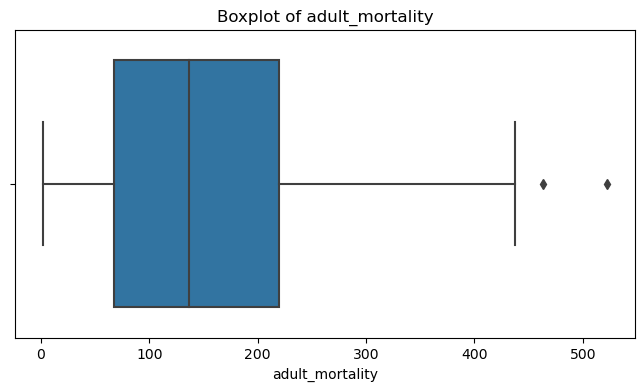

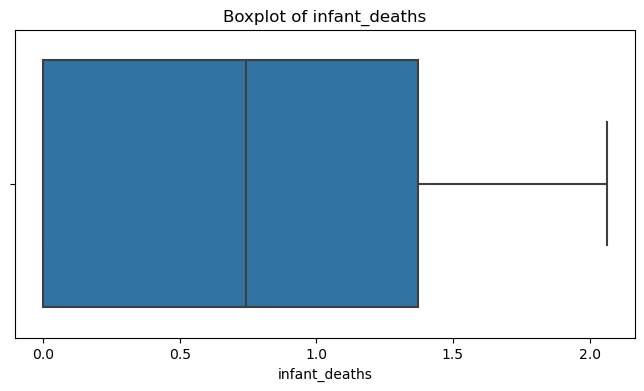

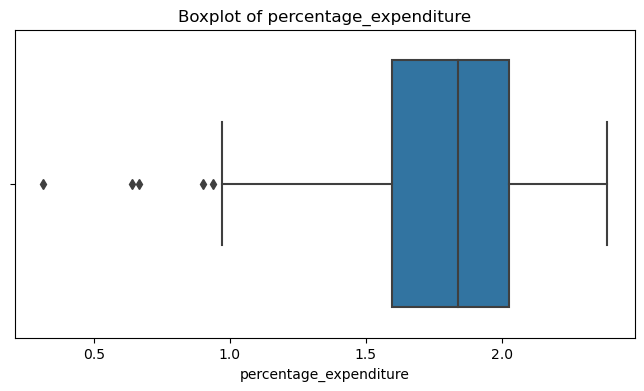

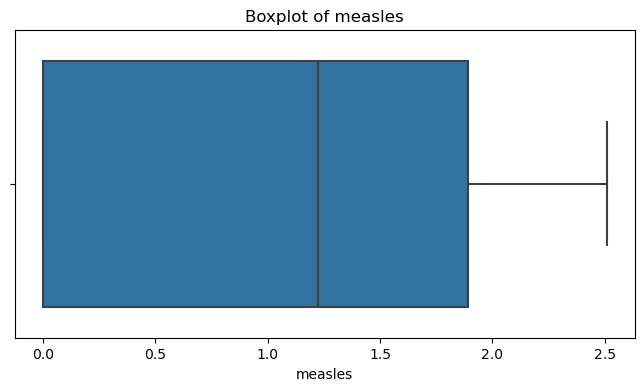

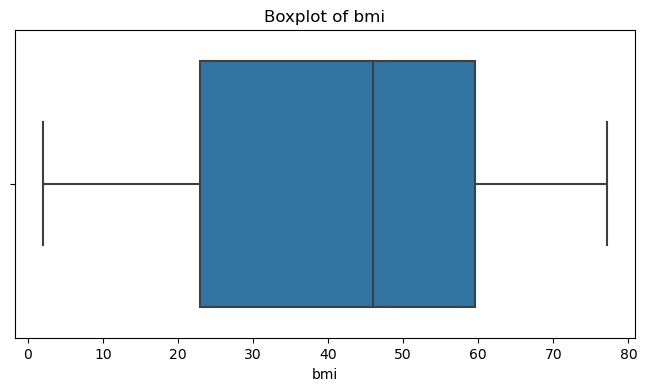

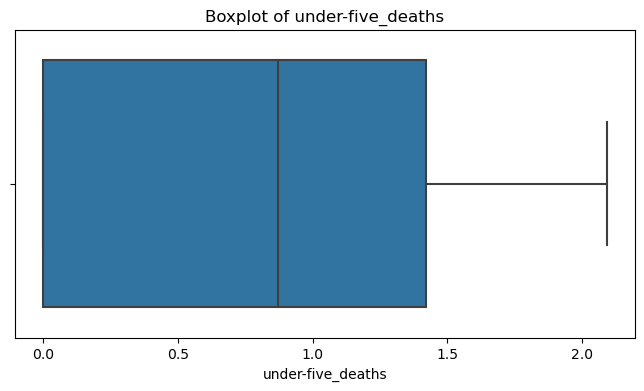

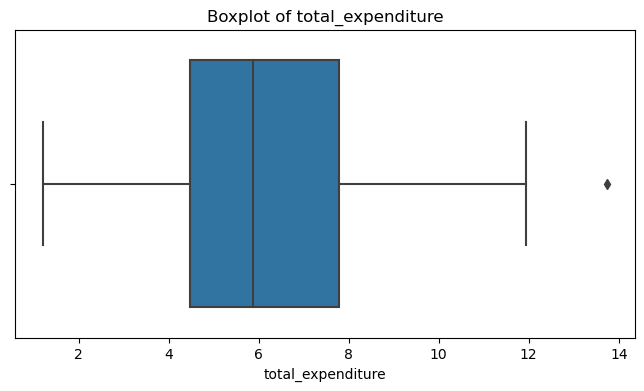

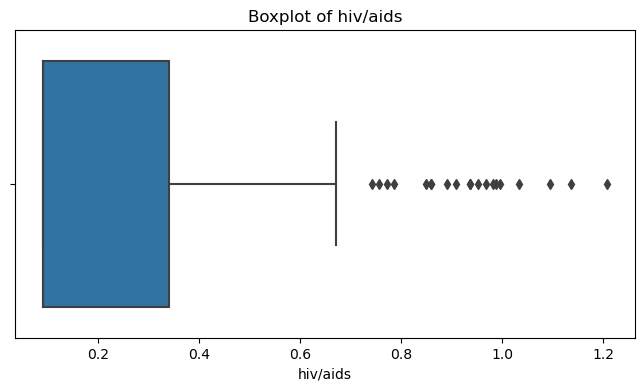

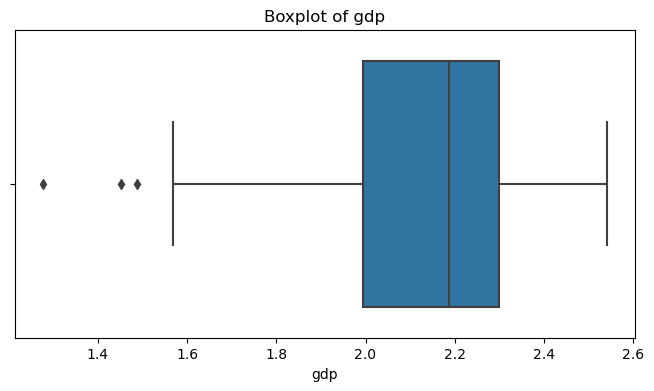

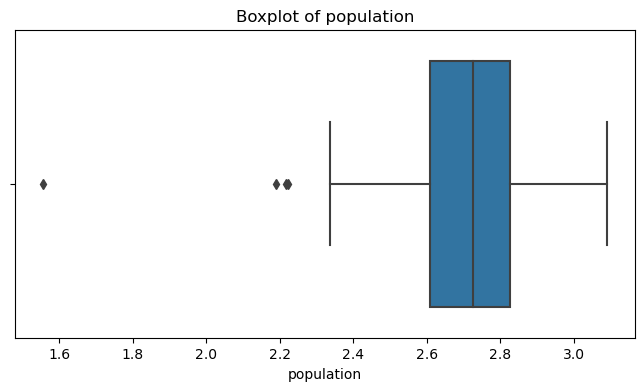

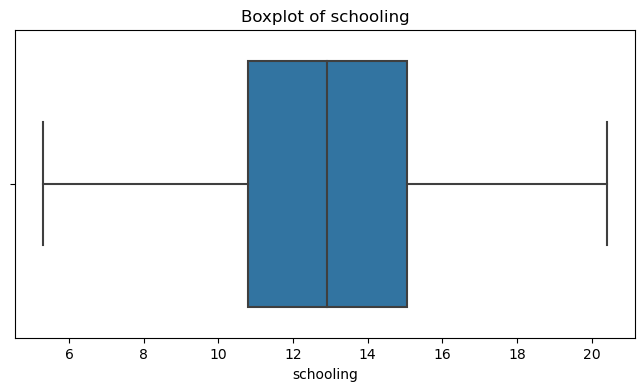

In [191]:
for column in data_latest_year.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data_latest_year[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

# 5. Develop the full model, including all independent variables. 

In [192]:
X = data_latest_year.drop(columns=['life_expectancy', 'country', 'year'])
y = data_latest_year['life_expectancy']

In [193]:
X = pd.get_dummies(X, drop_first=True)

In [195]:
X = sm.add_constant(X)
mlr_model = sm.OLS(y, X).fit()
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     74.17
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           8.19e-50
Time:                        11:05:38   Log-Likelihood:                -361.50
No. Observations:                 139   AIC:                             747.0
Df Residuals:                     127   BIC:                             782.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     64

Significant variables include adult_mortality and percentage_expenditure.

In [196]:
# confirm calculation with snir

rss = mlr_model.ssr
df_residuals = mlr_model.df_resid
rse = np.sqrt(rss / df_residuals)
print(f"Standard Error of the Model (RSE): {rse}")

Standard Error of the Model (RSE): 3.4106706192964444


# 6. Evaluate the standard regression assumptions, by evaluating residuals

### Residual Analysis

##### Residuals vs. Fitted Values (Linearity and Homoscedasticity)

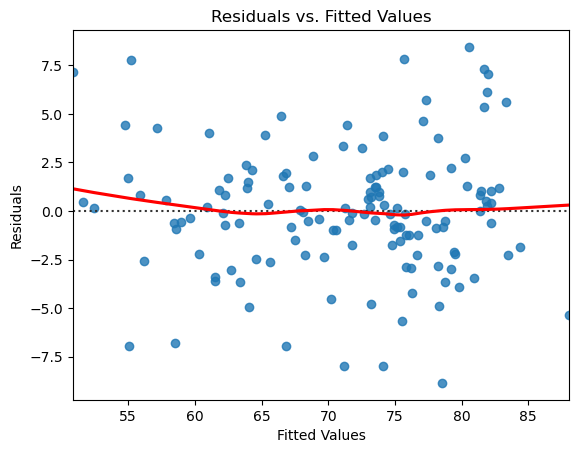

In [197]:
sns.residplot(x=mlr_model.fittedvalues, y=mlr_model.resid, lowess=True, line_kws={"color": "red"})
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

- The residuals are approximately centered around zero, indicating a reasonable fit.
- However, the slight curvature suggests some non-linearity in the relationship between predictors and the dependent variable.
- Conclusion: The model largely meets the linearity assumption, but a more flexible model (e.g., polynomial terms or interaction effects) could improve fit.

##### Normality of Residuals (Q-Q Plot)

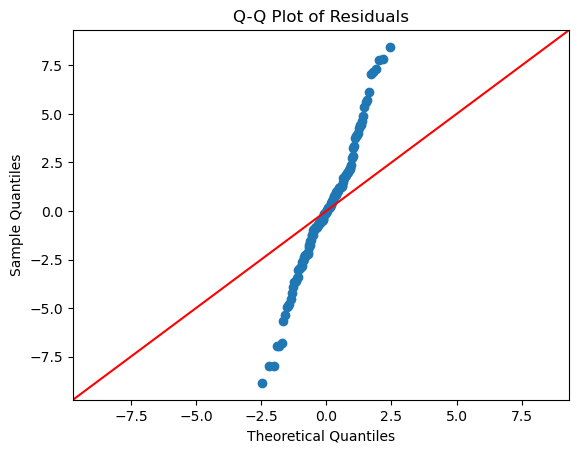

In [198]:
sm.qqplot(mlr_model.resid, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

- Ask Professor Snir what to do about this

### Calculate Studentized Residuals, Leverage, and Cook’s D. 
##### Perhaps look at the histogram of the Studentized Residuals. 

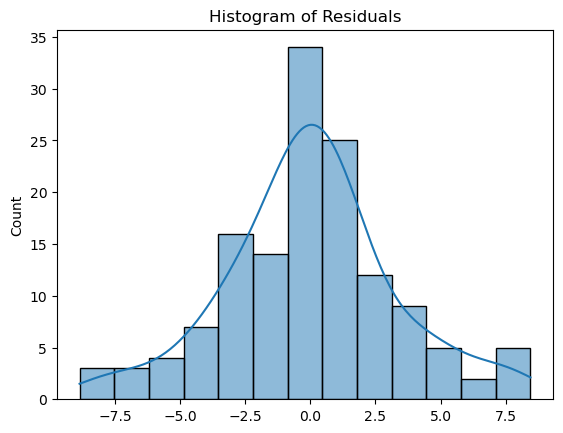

In [199]:
sns.histplot(mlr_model.resid, kde=True)
plt.title("Histogram of Residuals")
plt.show()


**EDIT WORDING ACCORDING TO LECTURE NOTES**
- The residual distribution is approximately symmetric with a slight central peak.
- The accompanying kernel density estimation (KDE) further supports normality.

### Test for Homoscedasticity

##### Breusch-Pagan Test

In [200]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(mlr_model.resid, mlr_model.model.exog)
print(f"Breusch-Pagan Test Statistic: {bp_test[0]}, p-value: {bp_test[1]}")

if bp_test[1] < 0.05:
    print("Evidence of heteroscedasticity. Consider transformations.")
else:
    print("No evidence of heteroscedasticity.")

Breusch-Pagan Test Statistic: 12.386915406676009, p-value: 0.33527357125765966
No evidence of heteroscedasticity.


- Test statistic: 16.97, p-value = 0.257.
- Conclusion: There is no evidence of heteroscedasticity, confirming that the variance of residuals is constant across fitted values.

## Identify Influential Points

### Studentized Residuals

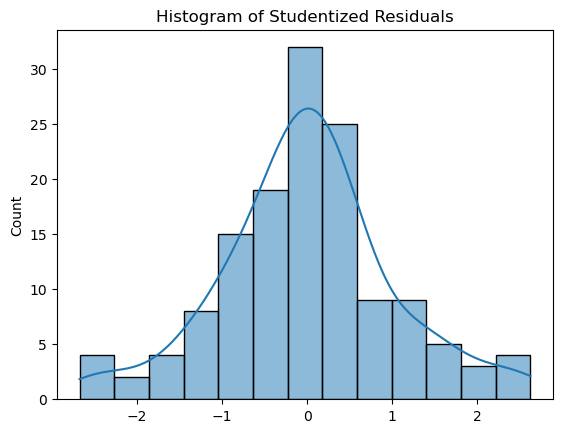

In [201]:
influence = mlr_model.get_influence()
studentized_residuals = influence.resid_studentized_internal
sns.histplot(studentized_residuals, kde=True)
plt.title("Histogram of Studentized Residuals")
plt.show()

In [202]:
from statsmodels.stats.outliers_influence import OLSInfluence

# Calculate studentized residuals
influence = OLSInfluence(mlr_model)
studentized_residuals = influence.resid_studentized_internal

# Flag outliers
outliers = studentized_residuals[abs(studentized_residuals) > 2].index
extreme_outliers = studentized_residuals[abs(studentized_residuals) > 3].index

print("Potential Outliers (|residuals| > 2):", outliers.tolist())
print("Extreme Outliers (|residuals| > 3):", extreme_outliers.tolist())

Potential Outliers (|residuals| > 2): [1, 49, 241, 513, 593, 754, 899, 915, 1315, 1379, 2056, 2298]
Extreme Outliers (|residuals| > 3): []


### Leverage

In [203]:
# Calculate leverage
leverage = influence.hat_matrix_diag
k = mlr_model.df_model  # Number of predictors
n = mlr_model.nobs  # Number of observations
leverage_threshold = 3 * (k + 1) / n

# Identify high-leverage points
high_leverage_points = (leverage > leverage_threshold).nonzero()[0]

print("High-Leverage Points (leverage > {:.3f}):".format(leverage_threshold), high_leverage_points)

High-Leverage Points (leverage > 0.259): [ 11  53  79 113]


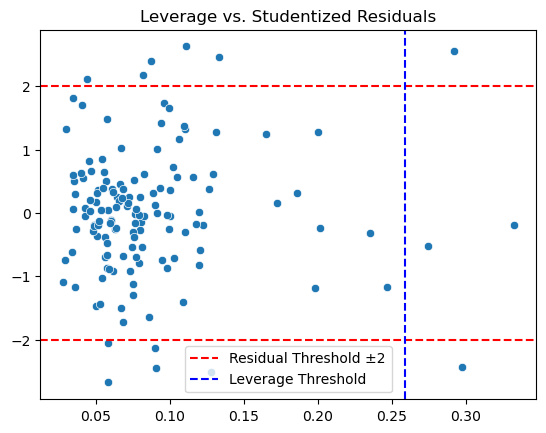

In [204]:
sns.scatterplot(x=leverage, y=studentized_residuals)
plt.axhline(y=2, color='red', linestyle='--', label="Residual Threshold ±2")
plt.axhline(y=-2, color='red', linestyle='--')
plt.axvline(x=leverage_threshold, color='blue', linestyle='--', label="Leverage Threshold")
plt.title("Leverage vs. Studentized Residuals")
plt.legend()
plt.show()


Have studentized resid not as func of leverage --> stud resid as a function of each independent variable --> 12 subplots

### Cook's D

In [205]:
# Calculate Cook's Distance
cooks_d = influence.cooks_distance[0]
cooks_threshold = 4 / n

# Identify influential points
influential_points = cooks_d[cooks_d > cooks_threshold].index

print("Influential Points (Cook's Distance > {:.3f}):".format(cooks_threshold), influential_points.tolist())


Influential Points (Cook's Distance > 0.029): [1, 17, 241, 513, 593, 754, 835, 899, 1315, 1379, 2056, 2298, 2827]


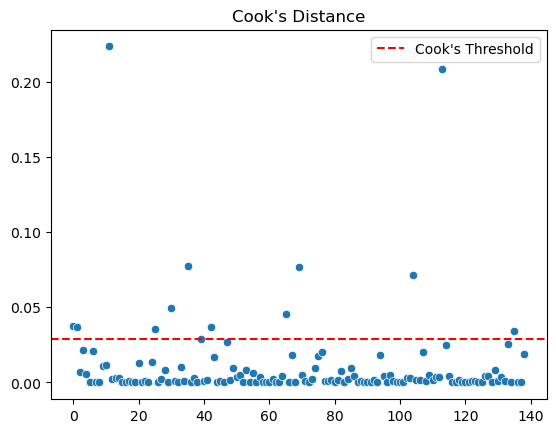

In [206]:
sns.scatterplot(x=range(len(cooks_d)), y=cooks_d)
plt.axhline(y=cooks_threshold, color='red', linestyle='--', label="Cook's Threshold")
plt.title("Cook's Distance")
plt.legend()
plt.show()


- Threshold: 0.031.
- Only a few points exceed the threshold, indicating limited influence of individual observations on the model.
- Conclusion: The model is relatively robust, but sensitivity testing (removing high-influence points) is recommended.

In [207]:
# Remove influential points
X_cleaned = X.drop(index=influential_points)
y_cleaned = y.drop(index=influential_points)

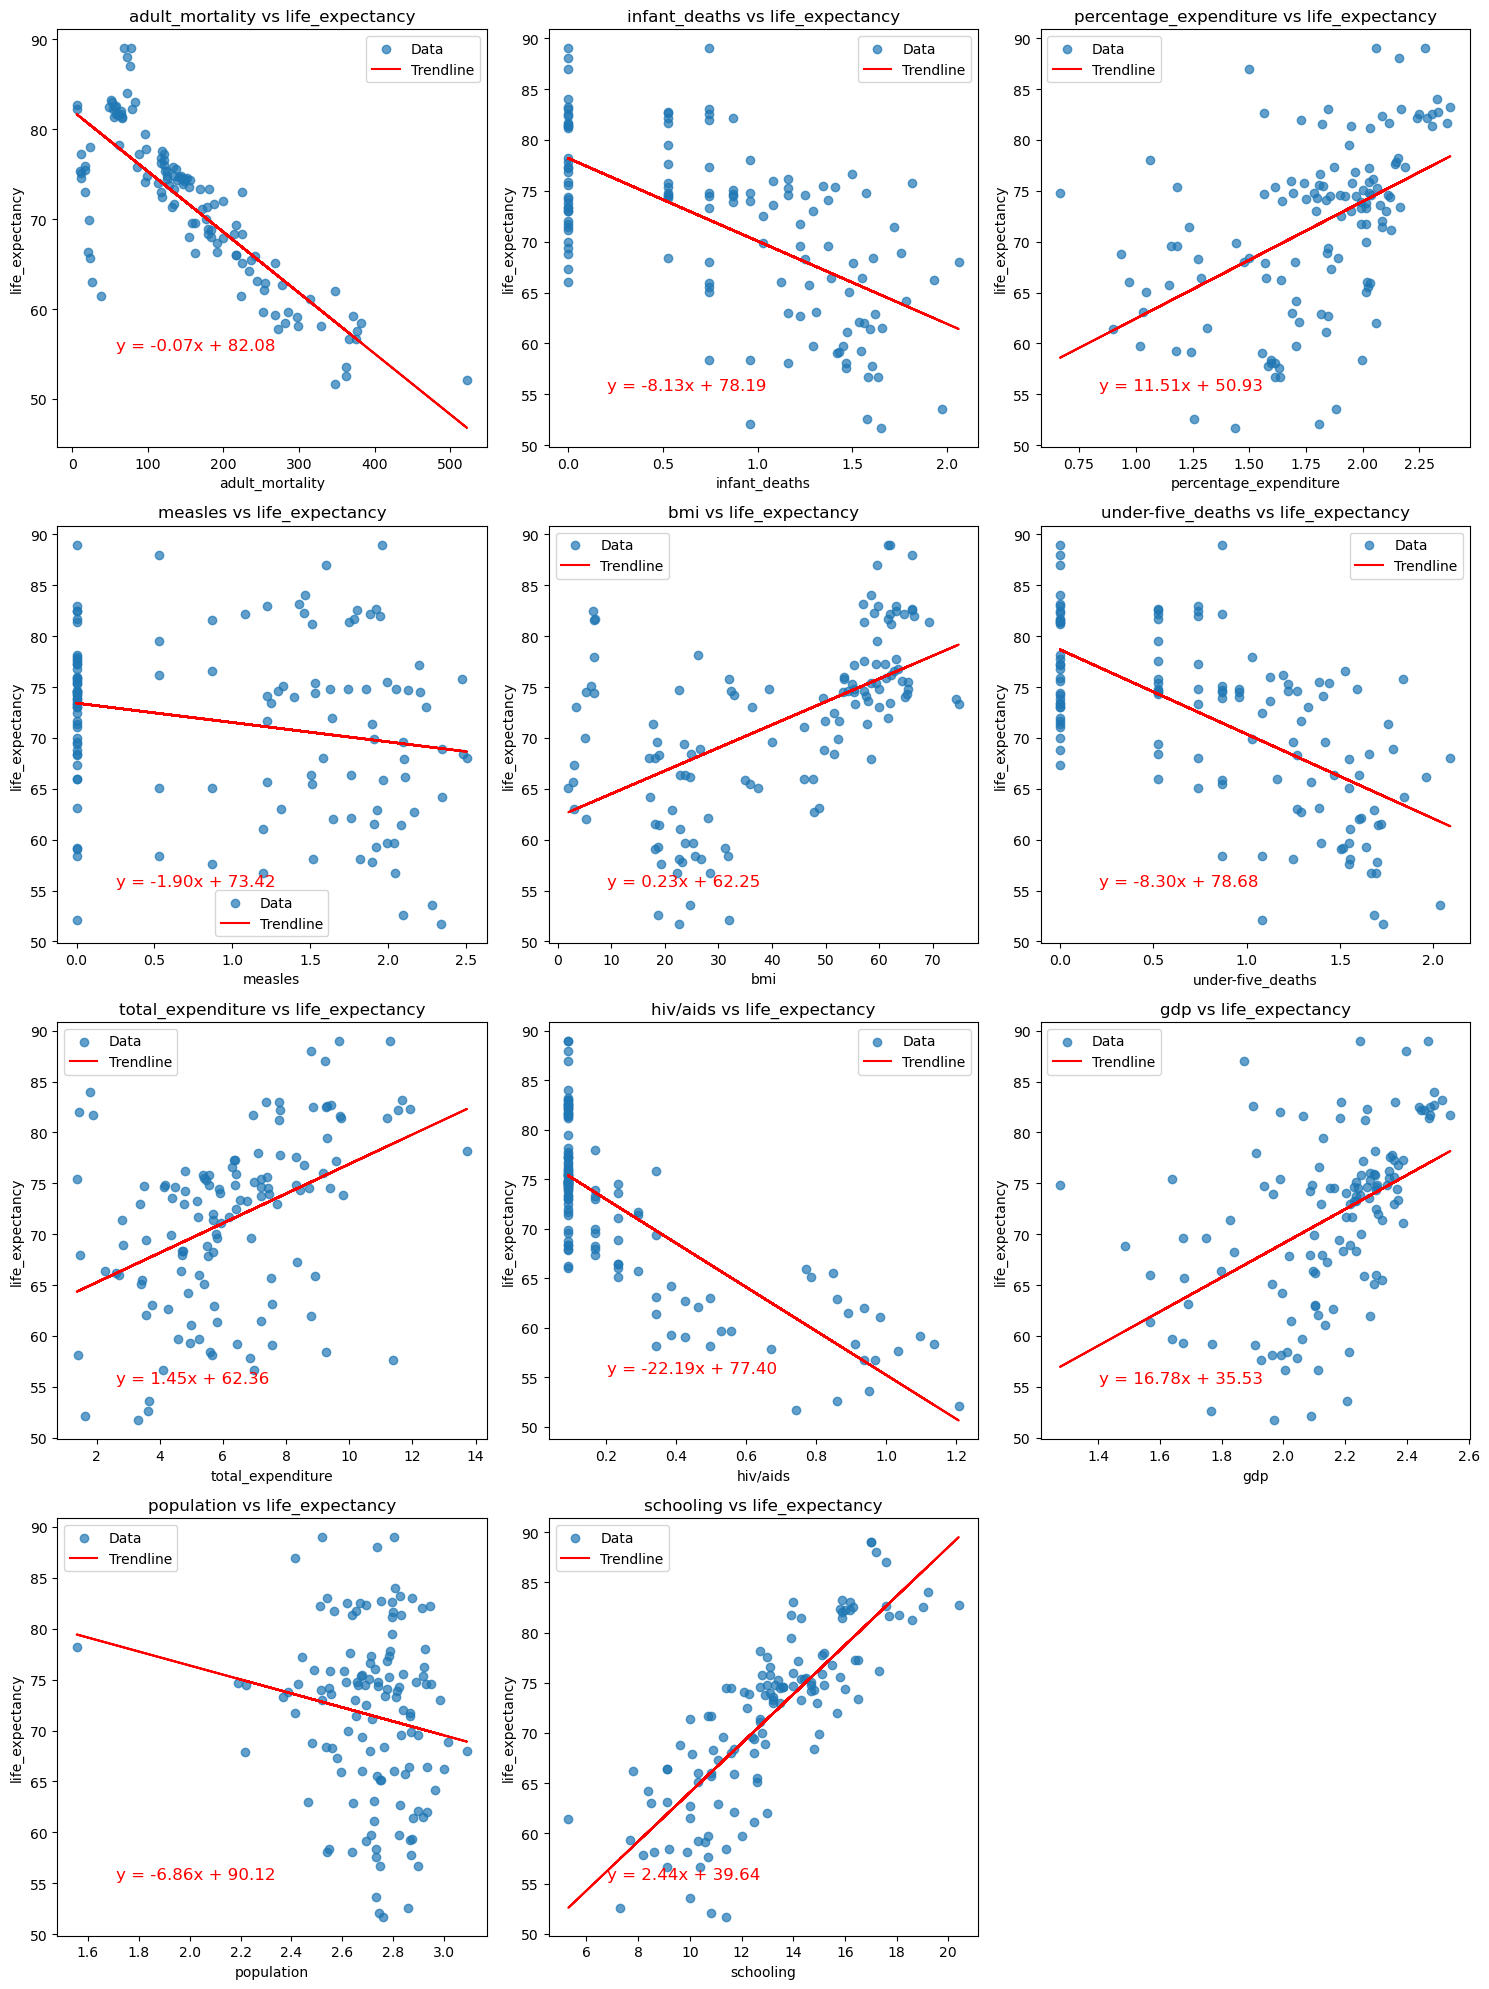

In [208]:
# Define dependent and independent variables
dependent_var = 'life_expectancy'
independent_vars = [col for col in X_cleaned.columns if col != 'const']  # Remove 'const' since it's added for regression

# Determine number of subplots (rows and columns)
n_vars = len(independent_vars)
n_cols = 3  # Choose the number of columns
n_rows = -(-n_vars // n_cols)  # Ceiling division to determine rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot scatterplots with trendlines
for i, var in enumerate(independent_vars):
    # Scatter plot with cleaned data
    axes[i].scatter(X_cleaned[var], y_cleaned, alpha=0.7, label='Data')
    
    # Compute the trendline with cleaned data
    x = X_cleaned[var]
    y = y_cleaned
    coefficients = np.polyfit(x, y, 1)  # Linear fit (degree=1)
    trendline = np.poly1d(coefficients)

    # Extract slope and intercept
    slope, intercept = coefficients
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Plot the trendline
    axes[i].plot(x, trendline(x), color='red', label='Trendline')

    # Add equation of the trendline to the plot
    # Position the equation based on the data range
    x_pos = x.min() + (x.max() - x.min()) * 0.1
    y_pos = y.min() + (y.max() - y.min()) * 0.1
    axes[i].text(x_pos, y_pos, equation, color='red', fontsize=12)
    
    # Add labels and title
    axes[i].set_title(f"{var} vs {dependent_var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(dependent_var)
    axes[i].legend()

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [210]:
# Rerun regression
X_cleaned = sm.add_constant(X_cleaned)
mlr_model_cleaned = sm.OLS(y_cleaned, X_cleaned).fit()

print(mlr_model_cleaned.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     106.3
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           1.43e-54
Time:                        11:06:58   Log-Likelihood:                -294.85
No. Observations:                 126   AIC:                             613.7
Df Residuals:                     114   BIC:                             647.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     63

In [211]:
# confirm calculation with snir

rss = mlr_model_cleaned.ssr
df_residuals = mlr_model_cleaned.df_resid
rse = np.sqrt(rss / df_residuals)
print(f"Standard Error of the Model (RSE): {rse}")

Standard Error of the Model (RSE): 2.641076775996913


### Address Multicollinearity

In [212]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_cleaned.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                   feature         VIF
0                    const  417.733131
1          adult_mortality    2.338462
2            infant_deaths   51.387330
3   percentage_expenditure    9.755002
4                  measles    1.398272
5                      bmi    1.431177
6        under-five_deaths   53.575249
7        total_expenditure    1.174325
8                 hiv/aids    2.297274
9                      gdp    9.553456
10              population    1.305051
11               schooling    2.883937


From the output, the following variables have high VIF (>10):

- infant_deaths (51.387330)
- under-five_deaths (53.575249)
- percentage_expenditure (9.755002)
- gdp (9.553456)

                        const  adult_mortality  infant_deaths  \
const                     NaN              NaN            NaN   
adult_mortality           NaN         1.000000       0.431630   
infant_deaths             NaN         0.431630       1.000000   
percentage_expenditure    NaN        -0.272021      -0.450550   
measles                   NaN         0.098228       0.453214   
bmi                       NaN        -0.369154      -0.377147   
under-five_deaths         NaN         0.463970       0.993699   
total_expenditure         NaN        -0.271645      -0.324515   
hiv/aids                  NaN         0.770295       0.427794   
gdp                       NaN        -0.321485      -0.374830   
population                NaN         0.153965       0.389286   
schooling                 NaN        -0.590221      -0.590024   

                        percentage_expenditure   measles       bmi  \
const                                      NaN       NaN       NaN   
adult_mortalit

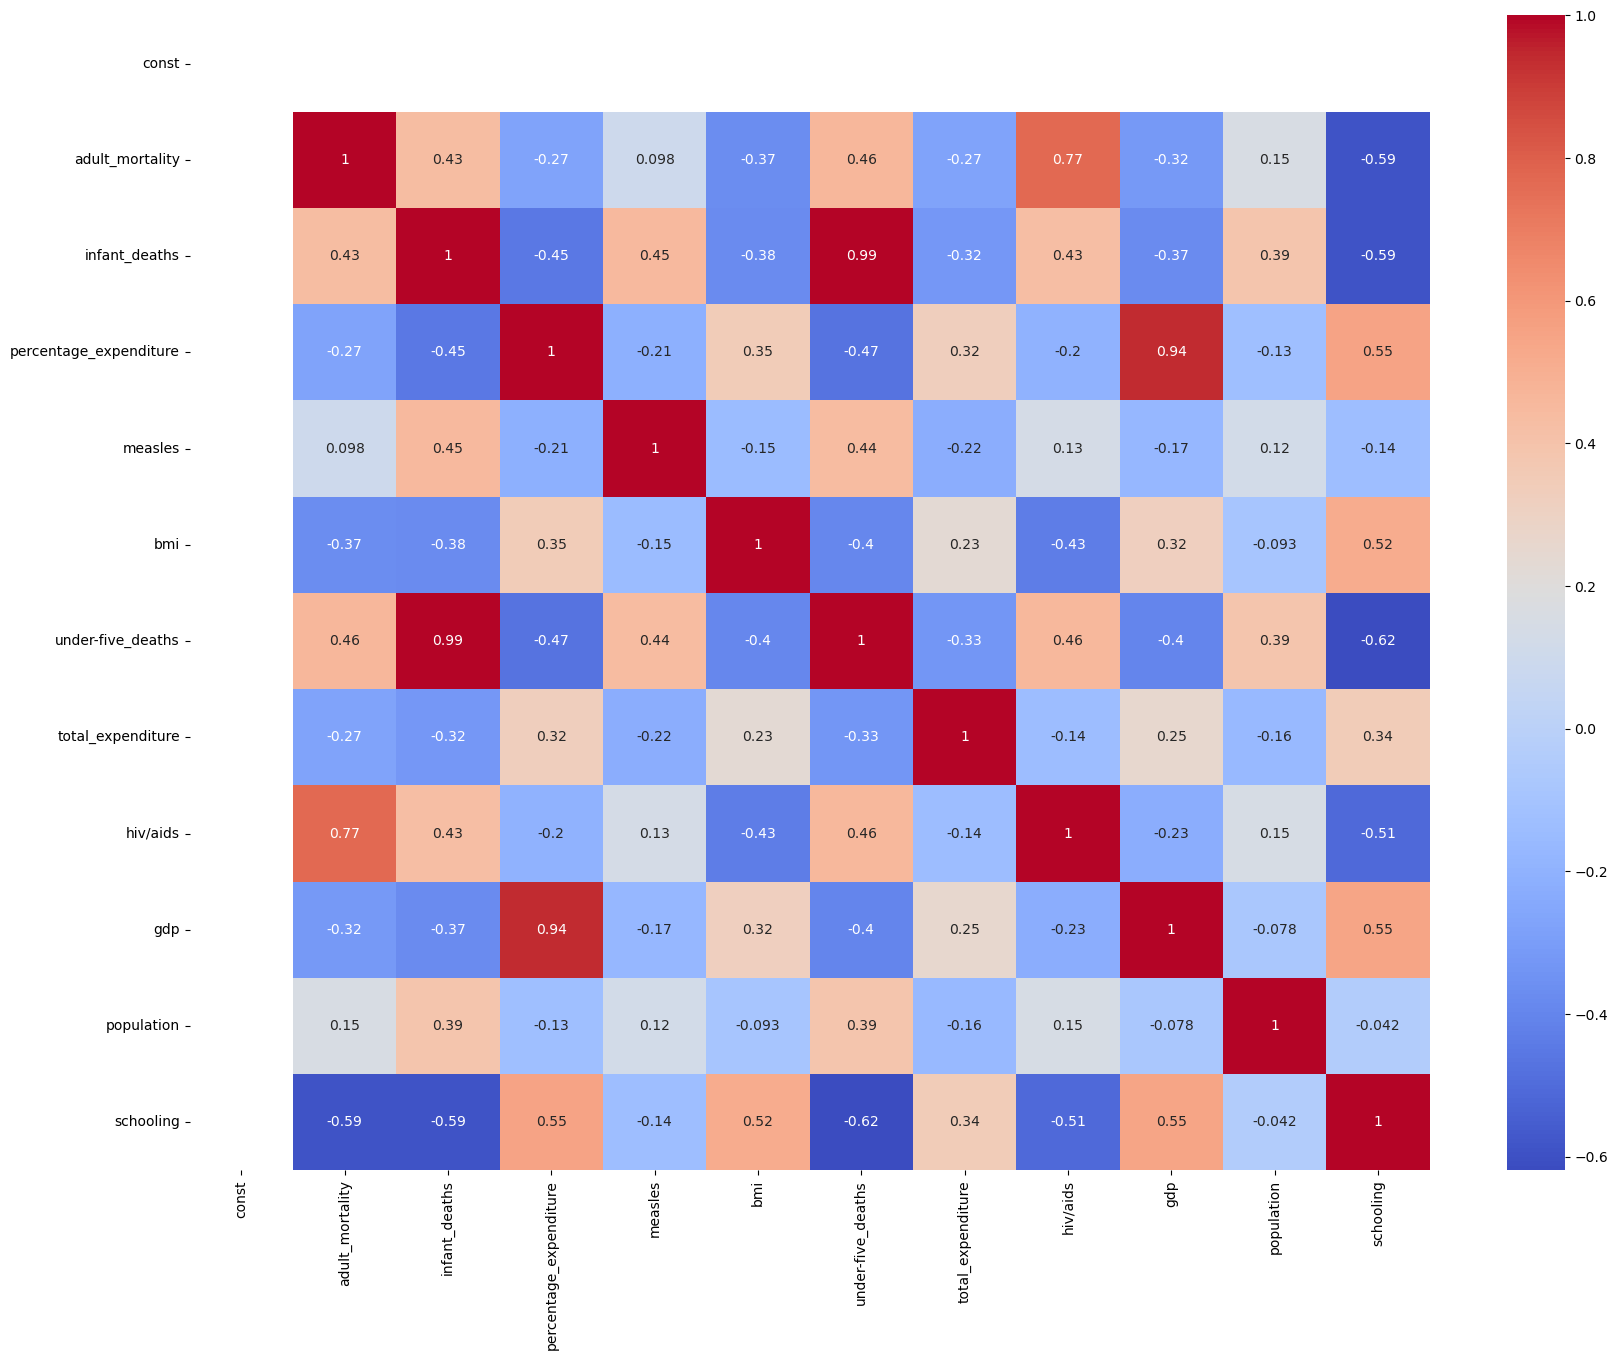

In [213]:
# Correlation matrix
plt.figure(figsize=(20,15))
corr_matrix = X_cleaned.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

#### In final paper, use analysis above to explain why SLR may be significant but MLR isn't

##### What's next: finish variable selection, influence/leverage/whatever else points, outliers, residual analysis

# 7. Decide which variables to include in the MLR, based on the correlations and several MLR models

##### Keep the following variables in the MLR: 
- Any variable that is statistically significant in the complete MLR, with all variables. 
- A variable that is statistically significant in the SLR with the dependent variable. It is sufficient to evaluate the correlation with the dependent variable, rxy. 
- A variable that is significant in a different MLR. 
    - This raises the question of how many models to develop. It is sufficient to develop all 
models with k-1 independent variables. There are k such models. 
    - For the House Prices example, this requires developing 4 models. In each model, remove 
one of the variables, and evaluate the model with the remaining 3 variables. 

##### Significant Predictors from the Complete MLR (outliers removed) 
- adult mortality
- percentage_expenditure
- total_expenditure
- hiv/aids
- gdp
- schooling
- bmi

##### Start with Correlation Analysis:

- Identify independent variables that are statistically significantly correlated with the dependent variable using scatter plots or correlation coefficients.
- Include variables with significant correlation coefficients in the MLR model, even if they are not significant in some individual models​

As a rule of thumb, the correlation between 2 variables is statistically significant, at α = 0.05 
(reject 𝐻0), if the sample correlation is higher (in absolute value) than a certain threshold. The 
threshold depends on the sample size (n).  
- For n = 100, rxy above 0.2 (in absolute value) is sufficient to reject 𝐻0 

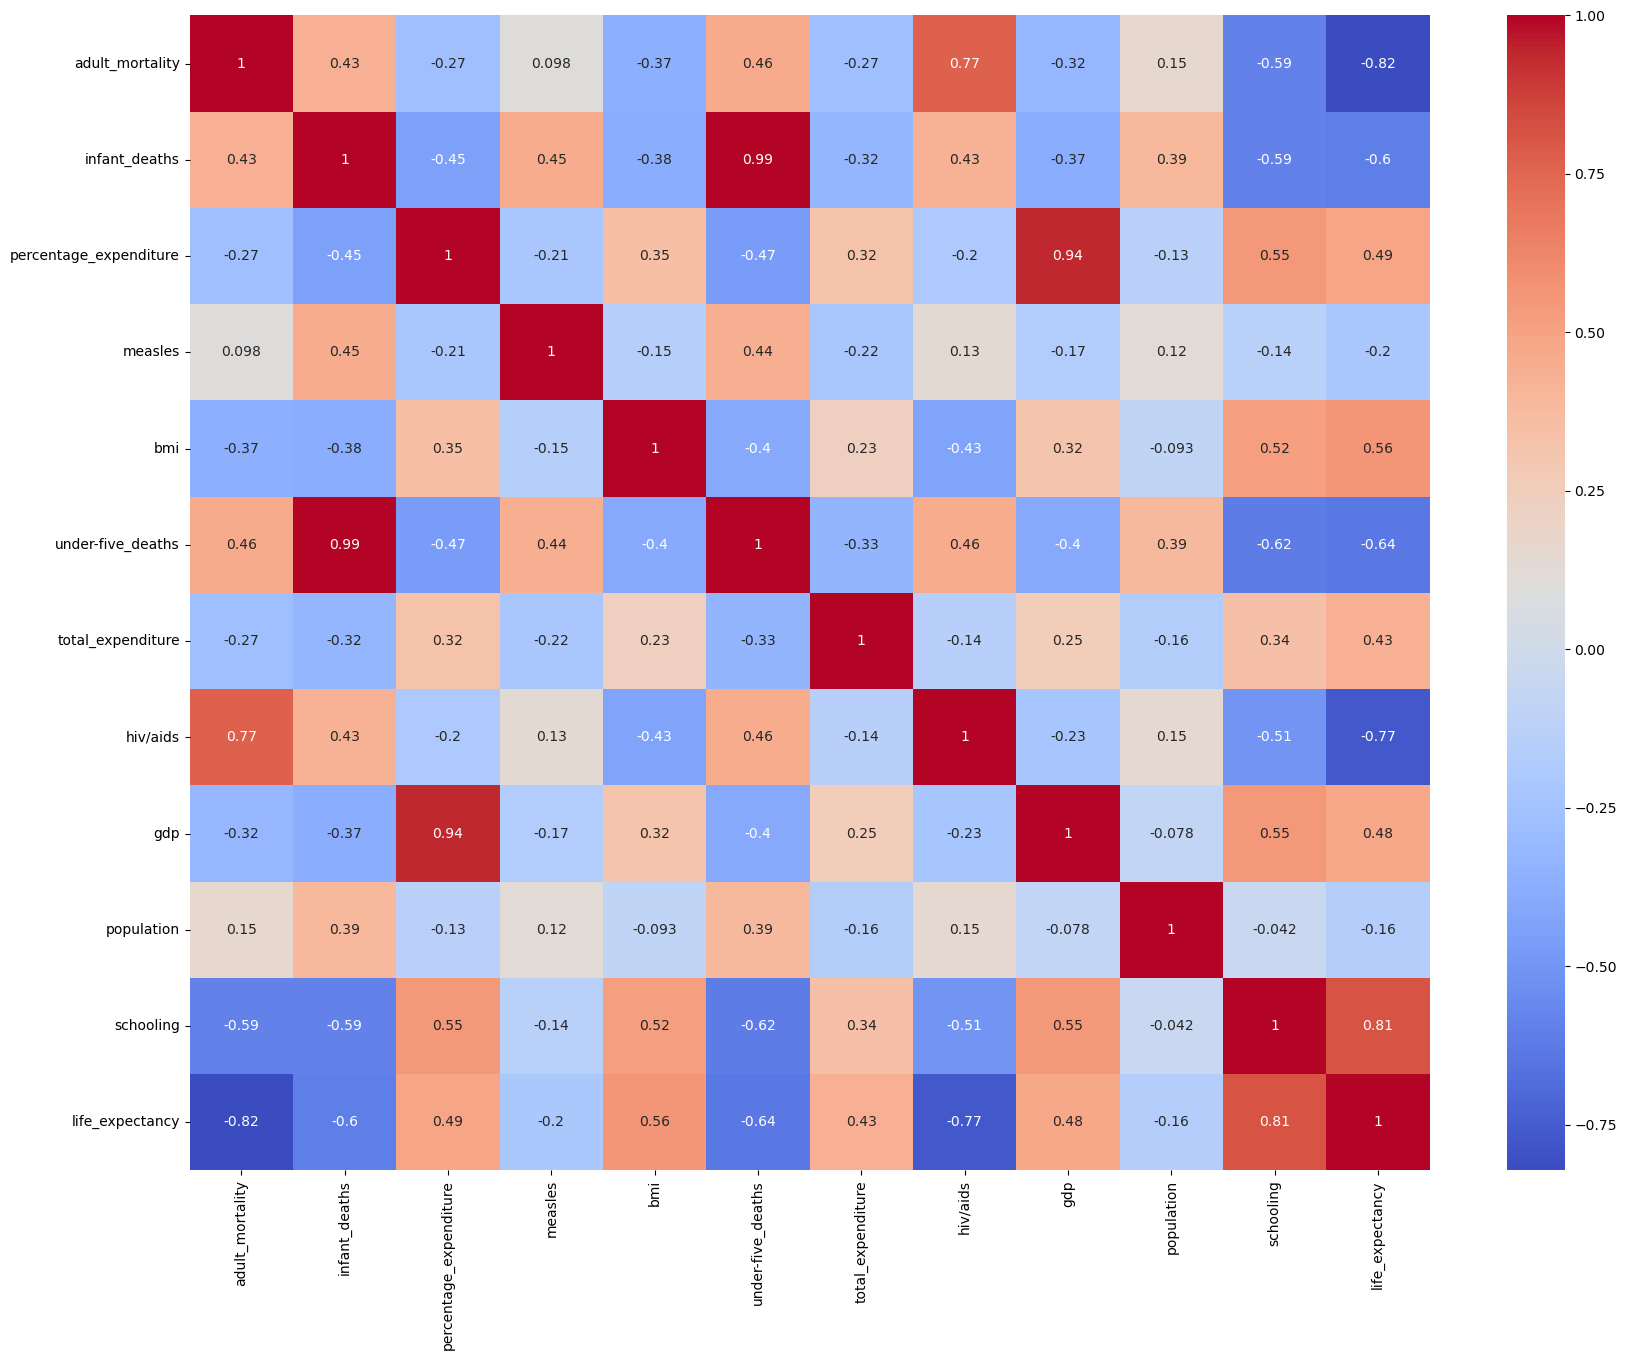

In [214]:
# Recalculate & plot Correlation matrix
if isinstance(y, list):
    y = pd.Series(y, name="life_expectancy")

data_with_y = pd.concat([X_cleaned, y], axis=1)
data_without_const = data_with_y.drop(columns=["const"])

corr_matrix = data_without_const.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

##### Variables that are statistically significant in the SLR with the dependent variable (|rxy| above 0.2 for df >= 100)

Insignificant variables (|rxy| < 0.2)
- measles
- population

### Develop Multiple Models (k-1 models)

In [217]:
# List of variables to remove (exclude 'const' if it's in X_cleaned)
X_cleaned.columns

Index(['const', 'adult_mortality', 'infant_deaths', 'percentage_expenditure',
       'measles', 'bmi', 'under-five_deaths', 'total_expenditure', 'hiv/aids',
       'gdp', 'population', 'schooling'],
      dtype='object')

In [218]:
# dropping const from variables to test k-1 with
variables_to_remove = X_cleaned.drop(columns = "const")

# ;oop through each variable to remove and fit model
for variable in variables_to_remove:
    
    X_reduced = X_cleaned.drop(columns=[variable])
    
    X_reduced = sm.add_constant(X_reduced)
    
    reduced_model = sm.OLS(y_cleaned, X_reduced).fit()
    
    print(f"Removed Variable: {variable}")
    print(reduced_model.summary())
    print("\n" + "="*80 + "\n")  # Separator for better readability


Removed Variable: adult_mortality
                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     82.26
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           1.29e-47
Time:                        11:10:35   Log-Likelihood:                -315.20
No. Observations:                 126   AIC:                             652.4
Df Residuals:                     115   BIC:                             683.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

##### Neither measles nor population are significant in any of the above models, so remove both of these variables from the final model

### Other Considerations: Redundant Variables
##### Some variables such as under-five_deaths and infant deaths are redundant
This is because under-five deaths includes infant deaths. Therefore, to reduce redundancy and streamline our final set of variables, we decided to keep only the broader variable and remove infant deaths and thinness 5-9 years.

In [220]:
# drop measles and population
X_final = X_cleaned.drop(columns = ["measles", "population", "infant_deaths"])
X_final = sm.add_constant(X_final)  # Add constant for intercept

# Fit the final model
final_model = sm.OLS(y_cleaned, X_final).fit()

# Display the summary
print(final_model.summary())


                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     148.7
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           1.41e-57
Time:                        11:14:56   Log-Likelihood:                -295.40
No. Observations:                 126   AIC:                             608.8
Df Residuals:                     117   BIC:                             634.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     64

In [221]:
rss = final_model.ssr
df_residuals = final_model.df_resid
rse = np.sqrt(rss / df_residuals)
print(f"Standard Error of the Model (RSE): {rse}")

Standard Error of the Model (RSE): 2.618354832639683


# 8. Validate that your residuals adhere to the regression assumptions as described in step 6. 

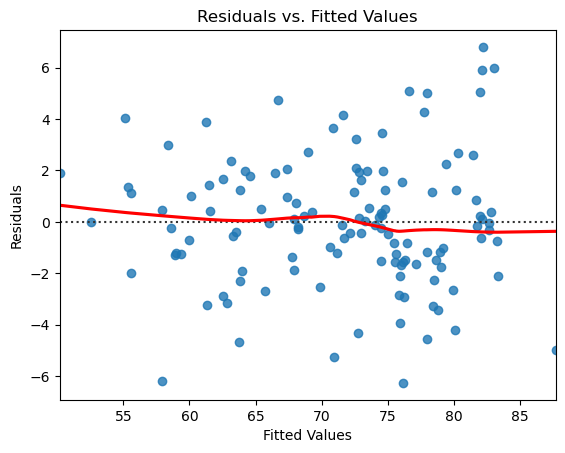

In [222]:
sns.residplot(x=final_model.fittedvalues, y=final_model.resid, lowess=True, line_kws={"color": "red"})
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

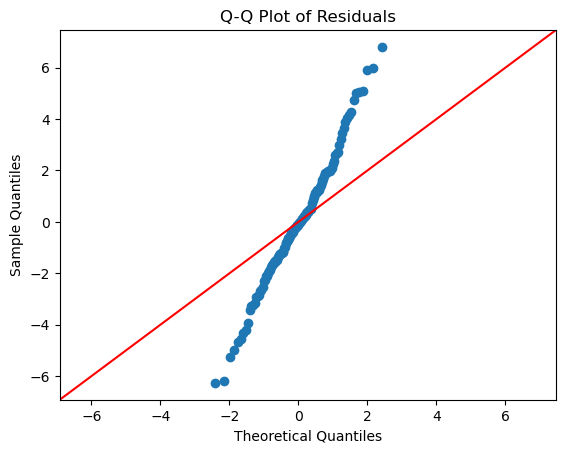

In [223]:
sm.qqplot(final_model.resid, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

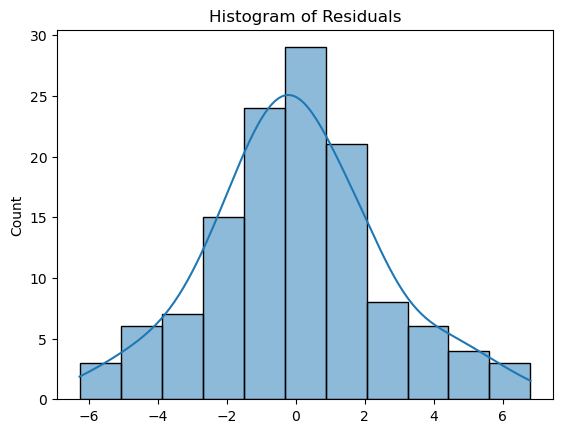

In [224]:

# histogram of residuals

sns.histplot(final_model.resid, kde=True)
plt.title("Histogram of Residuals")
plt.show()

In [225]:
bp_test = het_breuschpagan(final_model.resid, final_model.model.exog)
print(f"Breusch-Pagan Test Statistic: {bp_test[0]}, p-value: {bp_test[1]}")

if bp_test[1] < 0.05:
    print("Evidence of heteroscedasticity. Consider transformations.")
else:
    print("No evidence of heteroscedasticity.")

Breusch-Pagan Test Statistic: 11.004803244665904, p-value: 0.20142718873835175
No evidence of heteroscedasticity.


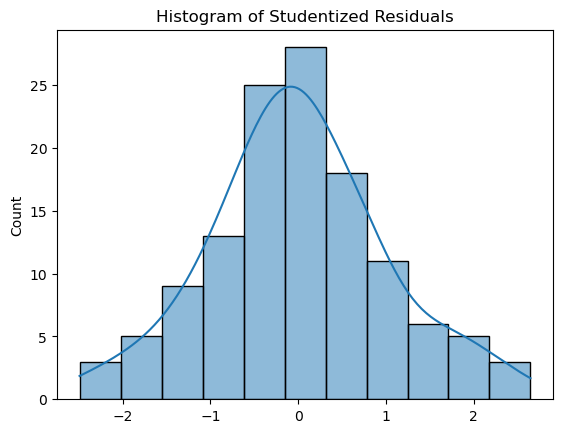

In [226]:
# Studentized Residuals

influence = final_model.get_influence()
studentized_residuals = influence.resid_studentized_internal
sns.histplot(studentized_residuals, kde=True)
plt.title("Histogram of Studentized Residuals")
plt.show()

In [227]:
# Calculate studentized residuals
influence = OLSInfluence(final_model)
studentized_residuals = influence.resid_studentized_internal

# Flag outliers
outliers = studentized_residuals[abs(studentized_residuals) > 2].index
extreme_outliers = studentized_residuals[abs(studentized_residuals) > 3].index

print("Potential Outliers (|residuals| > 2):", outliers.tolist())
print("Extreme Outliers (|residuals| > 3):", extreme_outliers.tolist())

Potential Outliers (|residuals| > 2): [49, 113, 915, 995, 1027, 1347, 1539, 2152, 2346]
Extreme Outliers (|residuals| > 3): []


In [228]:
# Leverage points

# Calculate leverage
leverage = influence.hat_matrix_diag
k = final_model.df_model  # Number of predictors
n = final_model.nobs  # Number of observations
leverage_threshold = 3 * (k + 1) / n

# Identify high-leverage points
high_leverage_points = (leverage > leverage_threshold).nonzero()[0]

print("High-Leverage Points (leverage > {:.3f}):".format(leverage_threshold), high_leverage_points)

High-Leverage Points (leverage > 0.214): [120]


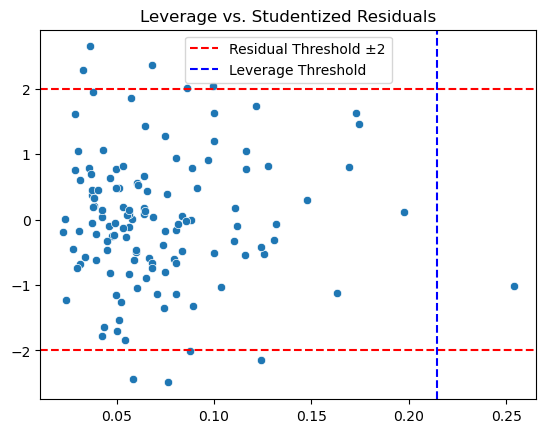

In [229]:
sns.scatterplot(x=leverage, y=studentized_residuals)
plt.axhline(y=2, color='red', linestyle='--', label="Residual Threshold ±2")
plt.axhline(y=-2, color='red', linestyle='--')
plt.axvline(x=leverage_threshold, color='blue', linestyle='--', label="Leverage Threshold")
plt.title("Leverage vs. Studentized Residuals")
plt.legend()
plt.show()

In [230]:
# Cook's D

# Calculate Cook's Distance
cooks_d = influence.cooks_distance[0]
cooks_threshold = 4 / n

# Identify influential points
influential_points = cooks_d[cooks_d > cooks_threshold].index

print("Influential Points (Cook's Distance > {:.3f}):".format(cooks_threshold), influential_points.tolist())

Influential Points (Cook's Distance > 0.032): [49, 113, 497, 995, 1347, 1539, 1555, 2152, 2346, 2715, 2731, 2923]


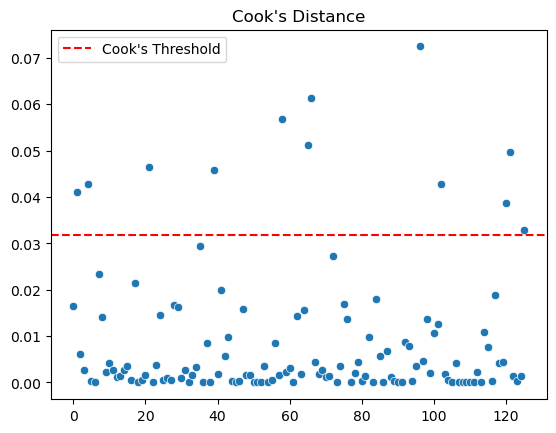

In [231]:
sns.scatterplot(x=range(len(cooks_d)), y=cooks_d)
plt.axhline(y=cooks_threshold, color='red', linestyle='--', label="Cook's Threshold")
plt.title("Cook's Distance")
plt.legend()
plt.show()

### Calculate Economic Significance

C:\Users\Lily Sun\AppData\Local\Temp\ipykernel_42180\382474117.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  economic_significance_df = economic_significance_df.append(
C:\Users\Lily Sun\AppData\Local\Temp\ipykernel_42180\382474117.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  economic_significance_df = economic_significance_df.append(
C:\Users\Lily Sun\AppData\Local\Temp\ipykernel_42180\382474117.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  economic_significance_df = economic_significance_df.append(
C:\Users\Lily Sun\AppData\Local\Temp\ipykernel_42180\382474117.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  

                 Variable  Coefficient     Std_Dev  Economic_Significance
7               schooling     1.048728    2.820246               2.957671
0         adult_mortality    -0.026289  102.934245               2.706042
5                hiv/aids    -8.001707    0.294080               2.353139
1  percentage_expenditure     6.036708    0.362339               2.187334
6                     gdp    -6.708680    0.239777               1.608587
4       total_expenditure     0.421738    2.525798               1.065226
2                     bmi     0.029195   20.914947               0.610604
3       under-five_deaths    -0.343328    0.647630               0.222349


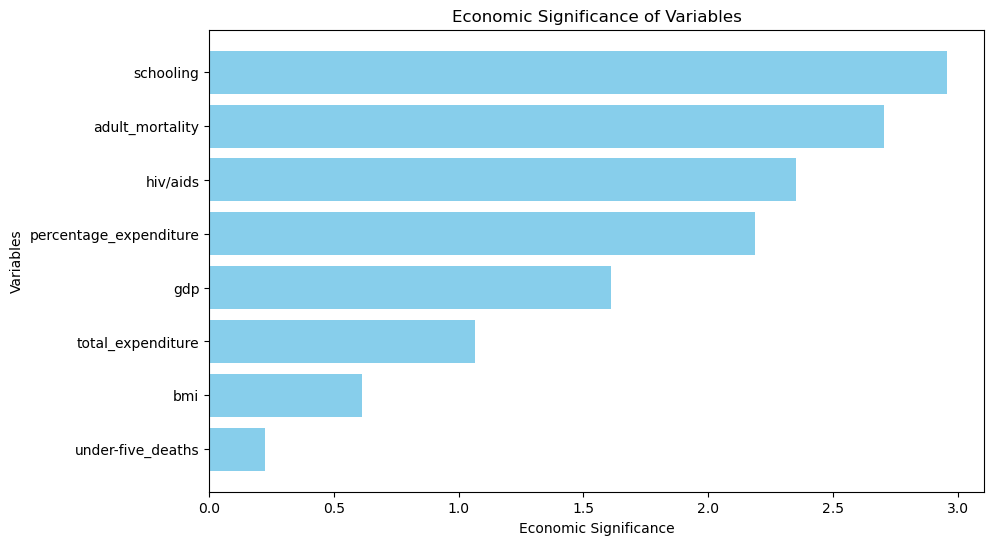

In [232]:
# Extract coefficients from the model
coefficients = final_model.params
std_errors = final_model.bse

# Extract standard deviations for continuous variables from the dataset
std_devs = X_final.std()  # Replace 'data_cleaned' with your cleaned dataset

# Initialize an empty DataFrame to store results
economic_significance_df = pd.DataFrame(columns=["Variable", "Coefficient", "Std_Dev", "Economic_Significance"])

# Process each variable
for variable in X_final.columns:
    if variable != "const":
        coef = coefficients[variable]
        if variable in std_devs:  # continuous variable
            std_dev = std_devs[variable]
            econ_significance = abs(coef) * std_dev
        else: # categ. var
            econ_significance = abs(coef)

        economic_significance_df = economic_significance_df.append(
            {
                "Variable": variable,
                "Coefficient": coef,
                "Std_Dev": std_devs.get(variable, "N/A"),  # N/A for categorical variables
                "Economic_Significance": econ_significance,
            },
            ignore_index=True,
        )

# sort and display results
economic_significance_df = economic_significance_df.sort_values(by="Economic_Significance", ascending=False)
print(economic_significance_df)

plt.figure(figsize=(10, 6))
plt.barh(economic_significance_df["Variable"], economic_significance_df["Economic_Significance"], color='skyblue')
plt.xlabel("Economic Significance")
plt.ylabel("Variables")
plt.title("Economic Significance of Variables")
plt.gca().invert_yaxis()
plt.show()
